[View in Colaboratory](https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/2_3_Coding_the_Illiac.ipynb)

# Coding the Illiac, Part 3
OK, now let's code the actual *Illiac Suite* with the rules Hiller and Issacson used.

## Setup
This time we'll need to import our music libraries.

In [0]:
# install external libraries
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!pip install -q pretty_midi
!pip install -q pyfluidsynth
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1

In [2]:
# imports
import mai
import pretty_midi
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Rules

## First, no rules
Just to hear what a random melody sounds like...

In [3]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 127
  new_note = random.randint(0,127)
  
  # append new_note to the melody
  my_melody += [new_note]
    
# print the random melody
print my_melody

[88, 83, 16, 23, 23, 88, 19, 96, 67, 78, 120, 46]


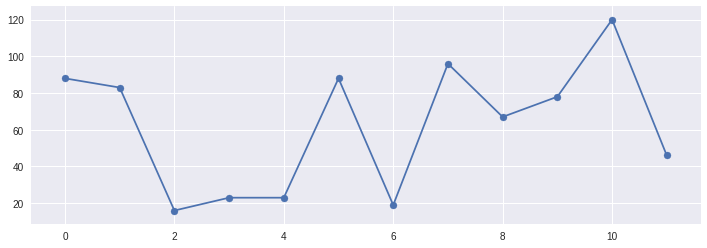

In [4]:
# let's see it
plt.figure(figsize=(12,4))
plt.plot(my_melody)
plt.scatter(range(len(my_melody)), my_melody);

In [5]:
# let's hear it
mai.make_music(my_melody, pgm=1)

## Rule 1: the octave rule
"No melodic line may span more than an octave."


In [6]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 127
  new_note = random.randint(0,127)
  
  # the octave rule
  rule = max(my_melody + [new_note]) - min(my_melody + [new_note]) <= 12
         
  # if we pass the rule, append new_note to the melody
  if rule:
    my_melody += [new_note]
    
# print the random melody
print my_melody

[6, 15, 10, 15, 16, 17, 5, 16, 5, 10, 16, 16]


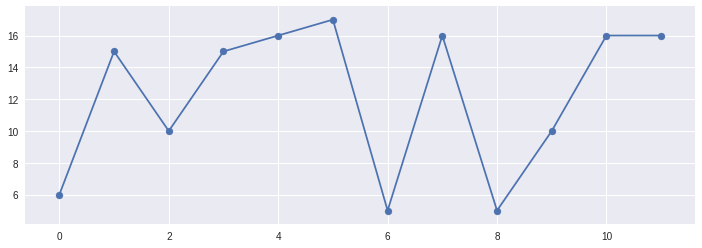

In [7]:
# let's see it
plt.figure(figsize=(12,4))
plt.plot(my_melody)
plt.scatter(range(len(my_melody)), my_melody);

In [8]:
# let's hear it
mai.make_music(my_melody, pgm=1)

## Rule 4: no skips of a major or minor seventh
"A melodic skip of a major or minor seventh  is forbidden  because this is a dissonant melodic interval."

In [9]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 127
  new_note = random.randint(0,127)
  
  # no skips of a major or minor seventh
  rule = len(my_melody) < 1 or abs(new_note - my_melody[-1]) != 11 and abs(new_note - my_melody[-1]) != 10
         
  # if we pass the rule, append new_note to the melody
  if rule:
    my_melody += [new_note]
    
# print the random melody
print my_melody

[7, 113, 73, 46, 41, 116, 71, 98, 101, 9, 123, 43]


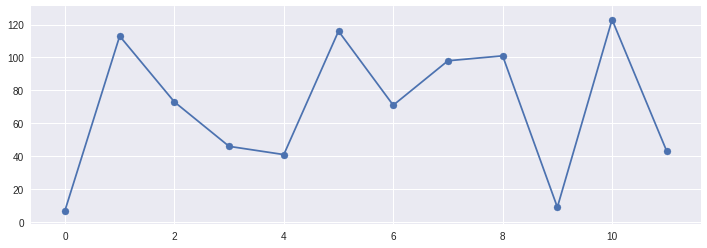

In [10]:
# let's see it
plt.figure(figsize=(12,4))
plt.plot(my_melody)
plt.scatter(range(len(my_melody)), my_melody);

In [11]:
# let's hear it
mai.make_music(my_melody, pgm=1)

## Rule 5: a skip must be followed by stepwise motion
"Any melodic skip, i.e., a melodic movement  of a minor third or more, must be followed by a tone repeat or by a stepwise motion with or without a change in direction. A stepwise motion is a minor or major second."

In [12]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 127
  new_note = random.randint(0,127)
  
  # a skip must be followed by stepwise motion
  rule = len(my_melody) < 2 or abs(my_melody[-1] - my_melody[-2]) < 3 or abs(new_note - my_melody[-1]) <= 2 
         
  # if we pass the rule, append new_note to the melody
  if rule:
    my_melody += [new_note]
    
# print the random melody
print my_melody

[50, 34, 32, 126, 125, 95, 93, 113, 112, 38, 39, 60]


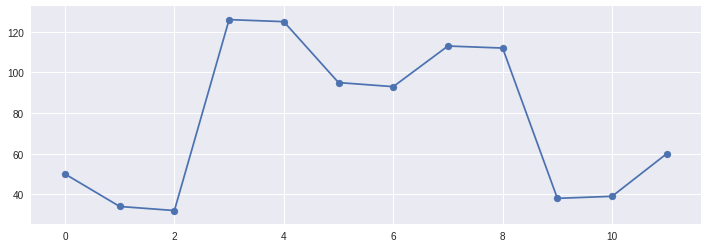

In [13]:
# let's see it
plt.figure(figsize=(12,4))
plt.plot(my_melody)
plt.scatter(range(len(my_melody)), my_melody);

In [14]:
# let's hear it
mai.make_music(my_melody, pgm=1)

## Rule 6: no more than one successive repeat of a given note
"No more than one successive repeat of a given note is permitted."

In [15]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 127
  new_note = random.randint(0,127)
  
  # no more than one successive repeat of a given note
  rule = len(my_melody) < 2 or not (new_note == my_melody[-2] == my_melody[-1])
         
  # if we pass the rule, append new_note to the melody
  if rule:
    my_melody += [new_note]
    
# print the random melody
print my_melody

[12, 24, 74, 107, 97, 0, 27, 100, 76, 67, 49, 111]


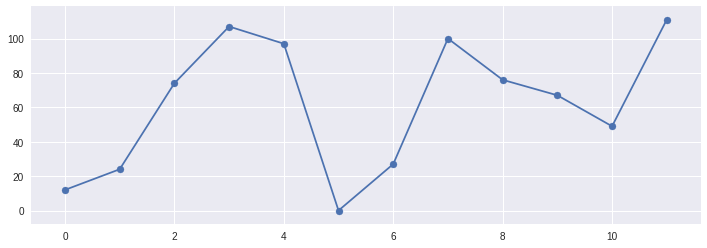

In [16]:
# let's see it
plt.figure(figsize=(12,4))
plt.plot(my_melody)
plt.scatter(range(len(my_melody)), my_melody);

In [17]:
# let's hear it
mai.make_music(my_melody, pgm=1)

# Now let's make some music... All of the rules

In [18]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 127
  new_note = random.randint(0,127)
  
  # the octave rule
  rule1 = max(my_melody + [new_note]) - min(my_melody + [new_note]) <= 12
  
  # no skips of a major or minor seventh
  rule4 = len(my_melody) < 1 or abs(new_note - my_melody[-1]) != 11 and abs(new_note - my_melody[-1]) != 10

  # a skip must be followed by stepwise motion
  rule5 = len(my_melody) < 2 or abs(my_melody[-1] - my_melody[-2]) < 3 or abs(new_note - my_melody[-1]) <= 2 
         
  # no more than one successive repeat of a given note
  rule6 = len(my_melody) < 2 or not (new_note == my_melody[-2] == my_melody[-1])
       
  # does it pass ALL of the rules? append new_note to the melody
  if rule1 and rule4 and rule5 and rule6:
    my_melody += [new_note]
    
# print the random melody
print my_melody

[34, 33, 28, 27, 28, 30, 37, 39, 34, 32, 27, 27]


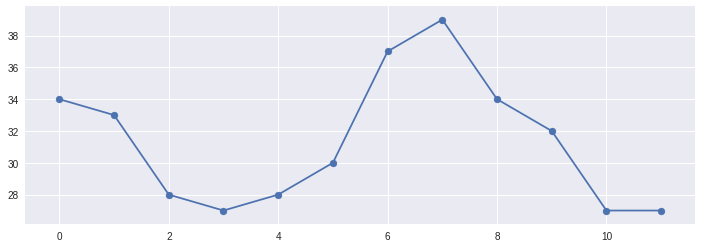

In [19]:
# let's see it
plt.figure(figsize=(12,4))
plt.plot(my_melody)
plt.scatter(range(len(my_melody)), my_melody);

In [20]:
# let's hear it
mai.make_music(my_melody, pgm=1)

# Preview of coming attractions: backtracking
Here we add one final rule to force the melody to end on the same note that it starts on. Rather than writing a function to describe the rule, I code it directly into the while loop. IMPORTANT: this cell may cause an infinite loop. WHY? The way to avoid this problem is called "backtracking," and we'll talk more about it next week.

REMEMBER: force quit the cell by clicking the stop button in the upper left.

In [21]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 127
  new_note = random.randint(0,127)
  
  # if it is the last pitch 
  if len(my_melody) == 12 - 1:

    # end on the first note
    new_note = my_melody[0]
  
  # the octave rule
  rule1 = max(my_melody + [new_note]) - min(my_melody + [new_note]) <= 12
  
  # no skips of a major or minor seventh
  rule4 = len(my_melody) < 1 or abs(new_note - my_melody[-1]) != 11 and abs(new_note - my_melody[-1]) != 10

  # a skip must be followed by stepwise motion
  rule5 = len(my_melody) < 2 or abs(my_melody[-1] - my_melody[-2]) < 3 or abs(new_note - my_melody[-1]) <= 2 
         
  # no more than one successive repeat of a given note
  rule6 = len(my_melody) < 2 or not (new_note == my_melody[-2] == my_melody[-1])
       
  # does it pass ALL of the rules? append new_note to the melody
  if rule1 and rule4 and rule5 and rule6:
    my_melody += [new_note]
    
# print the random melody
print my_melody

KeyboardInterrupt: ignored

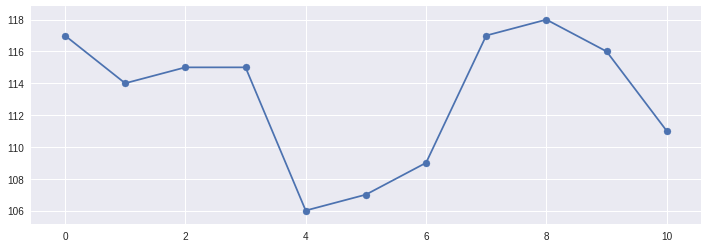

In [22]:
# let's see it
plt.figure(figsize=(12,4))
plt.plot(my_melody)
plt.scatter(range(len(my_melody)), my_melody);

In [23]:
# let's hear it
mai.make_music(my_melody, pgm=1)